<a href="https://colab.research.google.com/github/edwardhan925192/Daicon/blob/main/%EB%B2%94%EC%A3%84classify/%EB%B2%94%EC%A3%84train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
!pip install umap-learn

In [ ]:
!sudo apt-get install -y fonts-nanum
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
plt.rcParams['font.family'] = "NanumBarunGothic"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
dt = pd.read_csv('/content/train.csv')

#EDA

In [ ]:
police_dt = dt.drop('ID',axis = 1)

In [ ]:
target_count = police_dt['TARGET'].value_counts()

In [ ]:
###요일 삭제 ###
police_dt = police_dt.drop('요일',axis = 1)

In [ ]:
###범죄 발생지별 범죄###
dt_place = dt.groupby(['범죄발생지'])['TARGET'].mean()

In [ ]:
###importance check###

#STR values one-hot-encode

In [ ]:
def to_mean(x):
  return dt_place[x]

police_dt['범죄발생지'] = police_dt['범죄발생지'].apply(lambda x: to_mean(x))

In [ ]:
def onehotencode(df,col_to_oneshot):
  df2 = pd.concat((df,pd.get_dummies(df[col_to_oneshot])),axis = 1)
  df2.drop([col_to_oneshot],axis = 1, inplace = True)
  return df2    

In [ ]:
### 월 ###
police_dt = onehotencode(police_dt,'월') 

In [ ]:
### 요일 ###
police_dt = onehotencode(police_dt,'요일') 

#UMAP description

In [ ]:
### UMAP ###
import umap
reducer = umap.UMAP(n_neighbors=70, min_dist=0.005, n_components=2)
embedding = reducer.fit_transform(police_dt)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
embedding = pd.DataFrame(embedding)
embedding.columns = ['X','y']

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


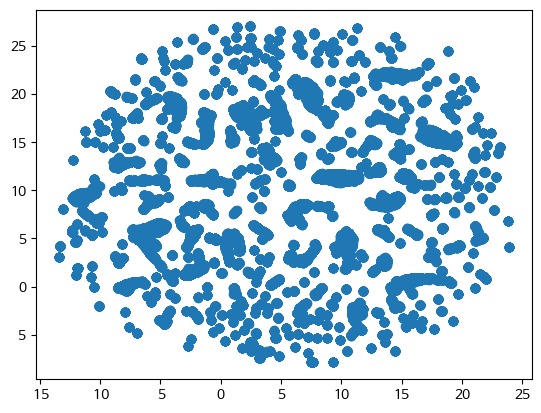

In [ ]:
plt.scatter(embedding['X'], embedding['y'])
plt.show()

#Feature selection

#preprocessing

In [ ]:
police_dt = police_dt.drop('TARGET',axis = 1)
X = police_dt
y = dt['TARGET']

In [ ]:
###Standard Scalar ###
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xss = ss.fit_transform(X)

In [ ]:
###quantile transformer###
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=0)
Xqt = qt.fit_transform(X)

In [ ]:
Xqtdf = pd.DataFrame(Xqt)
Xqtdf.columns = X.columns

In [ ]:
Xqtdf

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,0.777778,0.777778,0.058176,0.083333,0.786432,0.000000,0.000000,0.000000,0.685185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
1,0.944444,0.444444,0.222222,0.238095,0.890485,0.000000,0.000000,0.000000,0.481481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
2,0.666667,0.444444,0.777778,0.902778,0.420313,0.000000,0.000000,0.000000,0.095238,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
3,0.333333,0.444444,0.961128,0.986111,0.549003,0.693694,0.000000,0.000000,0.583333,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.333333
4,0.777778,0.833333,0.693426,0.809524,0.493363,0.000000,0.000000,0.000000,0.722222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.565995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,0.222222,0.500000,0.165556,0.185185,0.927363,0.894096,0.000000,0.000000,0.393939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
84402,0.666667,1.000000,0.896457,0.761905,0.348533,0.000000,0.000000,0.000000,0.481481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000
84403,0.555556,0.444444,0.001572,0.888889,0.846215,0.895488,0.000000,0.000000,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
84404,0.000000,0.833333,0.276940,0.466667,0.069247,0.563307,0.892128,0.840643,0.925926,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.333333


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xqtdf,y,test_size=0.25,random_state = 42)

#Model selection

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Log
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.linear_model import Ridge 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
warnings.filterwarnings('ignore')

In [ ]:
#train data 
traindata1 = Xqtdf

#target data
targetdata1 = y

#what to fold
Scv = 5

#scoring 
scoring = 'f1'

svc1 = SVC()
rfc1 = RandomForestClassifier() 
treec1 = DecisionTreeClassifier()
kn1 = KNeighborsClassifier()
xgb1 = xgb.XGBClassifier()
gbc1 = GradientBoostingClassifier()
lgb1 = LGBMClassifier()

#models name 
models = {'SVC': svc1,          
          'RFC': rfc1,
          'Tree': treec1,
          'KN': kn1,
          'XGB': xgb1,
          'GBC':gbc1,
          'LGB':lgb1,          
          }

In [ ]:
for model_name, model in models.items():
  model.fit(xtrain,ytrain)
  print(model_name)
  print(model.score(xtrain,ytrain))
  print(model.score(xtest,ytest))

SVC
0.525638190319727
0.526395602312577
RFC
0.9991469733350183
0.5320822670836888
Tree
0.9991469733350183
0.4415695194768268
KN
0.625189561481107
0.464410956307459
XGB
0.6154903323644635
0.5536442043408207
GBC
0.5498704663212435
0.5527438157520614
LGB
0.570548464552003
0.5542602596910245


In [ ]:
models_to_use = ['XGB','LGB']

In [ ]:
xgb1 = xgb.XGBClassifier()  
param_grid_XGB = {
      'max_depth': [6, 7, 8],
      'learning_rate': [0.01, 0.03],
      'n_estimators': [130, 150, 170],
      'gamma': [0, 0.1] }
grid_search = GridSearchCV(estimator=xgb1, param_grid=param_grid_XGB, cv=5, n_jobs=-1)
grid_search.fit(Xqtdf, y)
grid_search.best_estimator_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1], 'learning_rate': [0.01, 0.03],
                         'max_depth': [6, 7, 8],
                         'n_estimators': [130, 150, 170]})

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=170, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# Print all the parameters and their values
pprint.pprint(xgb_classifier.get_params())

In [ ]:
for model_name, model in models.items():
    print(f'{model_name}: ', end=' ')
    #we get scores from scores 
    scores = cross_validate(model, traindata1, targetdata1, cv = Scv, scoring=scoring,return_train_score= True)
    print(f'Accuracy scores: {np.round(scores["test_score"], 2)}')
    print(f'Average accuracy: {np.round(scores["test_score"].mean(), 2)}')

In [ ]:
 models_to_use = ['XGB','LGB']